In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas
import numpy as np

proc_dir = "../processed/"


In [27]:
file = pandas.read_csv(proc_dir + 'gesture_response_by_headset.csv')

In [28]:
print(file)

   headset  gesture_response  forecast_response
0    nc700                 4                  2
1    nc700                 5                  5
2    nc700                 4                  5
3    nc700                 4                  5
4    nc700                 5                  4
5    nc700                 5                  5
6    nc700                 2                  4
7    nc700                 3                  4
8    nc700                 3                  5
9    nc700                 3                  2
10   nc700                 4                  4
11  frames                 5                  1
12  frames                 5                  4
13  frames                 5                  3
14  frames                 4                  5
15  frames                 5                  4
16  frames                 5                  4
17  frames                 4                  2
18  frames                 4                  2
19  frames                 4            

In [29]:
headphone_entries = file[file['headset'] == 'nc700']
frame_entries = file[file['headset'] == 'frames']

In [30]:
headphone_means = headphone_entries.mean()
headphone_stdvs = headphone_entries.std()

print(headphone_means)
print(headphone_stdvs)

gesture_response     3.818182
forecast_response    4.090909
dtype: float64
gesture_response     0.981650
forecast_response    1.136182
dtype: float64


C:\Users\tech\AppData\Local\Temp\ipykernel_22640\1275675427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  headphone_means = headphone_entries.mean()
C:\Users\tech\AppData\Local\Temp\ipykernel_22640\1275675427.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  headphone_stdvs = headphone_entries.std()


In [31]:
frame_means = frame_entries.mean()
frame_stdvs = frame_entries.std()

print(frame_means)
print(frame_stdvs)

gesture_response     4.454545
forecast_response    3.545455
dtype: float64
gesture_response     0.522233
forecast_response    1.368476
dtype: float64


C:\Users\tech\AppData\Local\Temp\ipykernel_22640\2284008237.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  frame_means = frame_entries.mean()
C:\Users\tech\AppData\Local\Temp\ipykernel_22640\2284008237.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  frame_stdvs = frame_entries.std()


In [32]:
print(headphone_entries)
print(frame_entries)

   headset  gesture_response  forecast_response
0    nc700                 4                  2
1    nc700                 5                  5
2    nc700                 4                  5
3    nc700                 4                  5
4    nc700                 5                  4
5    nc700                 5                  5
6    nc700                 2                  4
7    nc700                 3                  4
8    nc700                 3                  5
9    nc700                 3                  2
10   nc700                 4                  4
   headset  gesture_response  forecast_response
11  frames                 5                  1
12  frames                 5                  4
13  frames                 5                  3
14  frames                 4                  5
15  frames                 5                  4
16  frames                 5                  4
17  frames                 4                  2
18  frames                 4            

In [33]:
gesture_vals = pandas.DataFrame({'headphones': [headphone_means['gesture_response']],'frames': [frame_means['gesture_response']]})
forecast_vals = pandas.DataFrame({'headphones': [headphone_means['forecast_response']],'frames': [frame_means['forecast_response']]})

In [34]:
gesture_stdvs =  pandas.DataFrame({'headphones': [headphone_stdvs['gesture_response']],'frames': [frame_stdvs['gesture_response']]})
forecast_stdvs = pandas.DataFrame({'headphones': [headphone_stdvs['forecast_response']],'frames': [frame_stdvs['forecast_response']]})

In [35]:
print(gesture_vals)
print(forecast_vals)

   headphones    frames
0    3.818182  4.454545
   headphones    frames
0    4.090909  3.545455


In [36]:
print(gesture_stdvs)
print(forecast_stdvs)

   headphones    frames
0     0.98165  0.522233
   headphones    frames
0    1.136182  1.368476


[3.81818182 4.45454545]


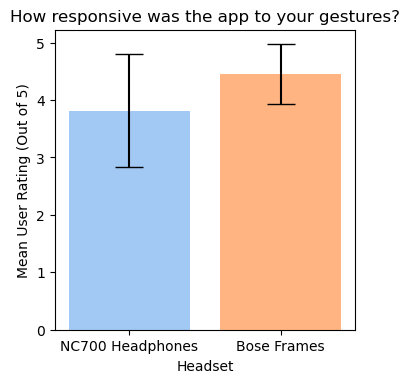

In [37]:
fig = plt.figure(figsize=(3,3))
plt.grid()

ax = fig.add_axes([0,0,1,1])
headsets = ['NC700 Headphones', 'Bose Frames']
vals = list(gesture_vals.values[0])
print(gesture_vals.values[0])
ax.bar(headsets, vals, yerr=gesture_stdvs.values[0],
 color=sns.color_palette('pastel', n_colors=2),
 capsize=10)

plt.title("How responsive was the app to your gestures?")
plt.xlabel("Headset")
plt.ylabel("Mean User Rating (Out of 5)")

plt.show()

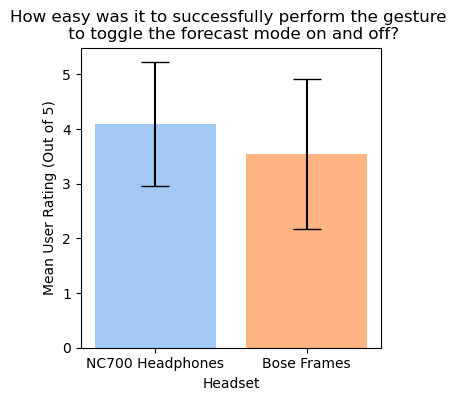

In [38]:
fig = plt.figure(figsize=(3,3))
plt.grid()

ax = fig.add_axes([0,0,1,1])
headsets = ['NC700 Headphones', 'Bose Frames']
vals2 = list(forecast_vals.values[0])

ax.bar(headsets, vals2, yerr=forecast_stdvs.values[0],
 color=sns.color_palette('pastel', n_colors=2),
 capsize=10)

plt.title("How easy was it to successfully perform the gesture \n to toggle the forecast mode on and off?")
plt.xlabel("Headset")
plt.ylabel("Mean User Rating (Out of 5)")

plt.show()

Text(0.5, 1.0, 'How easy was it to successfully perform the gesture \n to toggle the forecast mode on and off?')

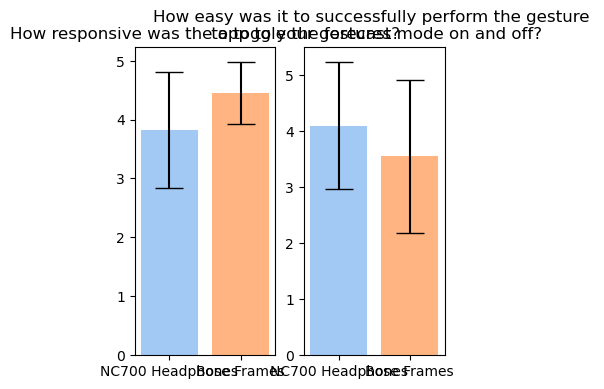

In [48]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,4), gridspec_kw={'width_ratios':[1,1]})
ax1.bar(headsets, vals, yerr=gesture_stdvs.values[0],
 color=sns.color_palette('pastel', n_colors=2),
 capsize=10)
ax1.set_title("How responsive was the app to your gestures?")
ax2.bar(headsets, vals2, yerr=forecast_stdvs.values[0],
 color=sns.color_palette('pastel', n_colors=2),
 capsize=10)
ax2.set_title("How easy was it to successfully perform the gesture \n to toggle the forecast mode on and off?")